<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогнозирование-оттока-клиентов-фитнес-клуба-методами-машинного-обучения" data-toc-modified-id="Прогнозирование-оттока-клиентов-фитнес-клуба-методами-машинного-обучения-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Прогнозирование оттока клиентов фитнес-клуба методами машинного обучения</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Создание-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Создание-модели-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоги-работы" data-toc-modified-id="Итоги-работы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоги работы</a></span></li></ul></div>

# Прогнозирование оттока клиентов фитнес-клуба методами машинного обучения

Заказчик - сеть фитнес-центров "Культурист-датасаентист"

Задачи - провести анализ и спрогнозировать отток пользователя, подготовить план действий по удержанию клиентов.

Данные  - `/datasets/gym_churn.csv`, где:

Данные клиента за предыдущий до проверки факта оттока месяц:

- 'gender' — пол;

- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

- 'Churn' — факт оттока в текущем месяце.

Загрузим необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score, silhouette_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.3f}'.format)

# Подготовка данных к анализу

Откроем данные и изучим их:

In [2]:
try:
    gym_churn=pd.read_csv('')
except:
    gym_churn=pd.read_csv('')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
gym_churn.duplicated().sum()

0

Видим, что в данных нет пропусков и дубликатов. 

Все данные типа `int64` представлены числовыми значениями дискретного характера. Данные типа `float64` относятся к непрерывным.

Однако данные дискретного характера, принимающие значение 0 или 1 в большинстве столбцов характеризуют наличие (1) или отстутствие признака (0). Поэтому имеет место задача бинарной классификации признаков.

Посмотрим на описание данных (Причем значение квартелей также характеризует признак):

In [6]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,0.510,0.845,0.487,0.308,0.903,4.681,0.412,29.184,146.944,4.323,3.725,1.879,1.767,0.265
std,0.500,0.362,0.500,0.462,0.295,4.550,0.492,3.258,96.356,4.191,3.749,0.972,1.053,0.442
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,18.000,0.148,1.000,0.000,0.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,1.000,1.000,0.000,27.000,68.869,1.000,1.000,1.181,0.963,0.000
50%,1.000,1.000,0.000,0.000,1.000,1.000,0.000,29.000,136.220,1.000,3.000,1.833,1.720,0.000
75%,1.000,1.000,1.000,1.000,1.000,6.000,1.000,31.000,210.950,6.000,5.000,2.536,2.510,1.000
max,1.000,1.000,1.000,1.000,1.000,12.000,1.000,41.000,552.591,12.000,31.000,6.024,6.147,1.000


In [7]:
gym_churn['Lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
20      7
19      7
18      7
21      5
23      2
24      2
26      2
22      2
31      1
27      1
29      1
Name: Lifetime, dtype: int64

Видим, что :
* большинство клиентов проживают рядом с фитнес-клубами, 
* 25% из них пользуются копоративным посещением, 
* 25% пришли по рекомендации друга, 
* большинство указали номер телефона при регистрации,
* всего 25% из всех посетителей имеют абонемент более, чем на 1 месяц,
* 25% посещают групповые занятия,
* возраст клиентов от 18 до 41 года
* у большинства клиентов срок абонемента закончится в ближайший месяц,
* большинство клиентов начали посещать фитнес-клуб всего 3 месяца назад или даже позже,
* большинство клиентов посещают фитнес-клуб около 2-х раз в неделю
* 25% клиентов закончили посещение фитнес-клуба в текущем месяце.

## Вывод

Качество данных хорошее - нет пропусков и дубликатов. Датафрейм содержит 4000 строк и 14 столбцов. 

Большая часть признаков содержит дискретные значения 1 и 0, и так как предполагаемые модели логистическая регрессия и случайный лес не требовательны к стандартизации, то не будем стандартизировать данные на этом этапе.

Данные отражают клиентские характеристики посетителей фитнес-клуба с учетом их оттока и имеют некоторые особенности.



Уже на этом этапе можно заметить сложности с удержанием клиентов и некоторые предпосылки будущего оттока и снижения выручки:
1. 75% клиентов имеют краткосрочные абонементы всего на 1 месяц. Почему? (Акционная цена на 1 месяц? - поработать с ценообразованием и сделать наиболее выгодными длинные годичные абонементы. Подключить возможность приобретения абонементов в рассрочку с помощью банков)
2. 25% пользуются копоративным посещением и 25% пришли по рекомендации друга - хороший показатель работы "сарафанного радио" и работы отдела продаж корпоративным клиентам.
3. Всего четверть клиентов посещают групповые занятия - это низкий показатель, ведь благодаря групповым занятиям складывается сообщество посещающих разные классы, растет вовлеченность клиентов в коллектив и фитнес-клуб в целом. Возможно , групповые занятия стоят в неудобное для большинства время. Необходимо выделить наиболее удобное вермя для посещения групповых занятий, например,Ю провести анкетирование клиентов, собрать жалобы и предложения.
4. Возраст клиентов от 18 до 41 года. А где люди старше 41 года? Недоработка отдела маркетинга по привлечению клиентов старшего возраста? Предпенсионерами и пенсионерами можно заполнить дневные групповые занятия. (Для работы с клиентами младше 18 лет необходимы отдельные условия, если они есть, то отделу маркетинга необходимо привлекать и их, например, в анкетах регистрации сделать поле выбора "дети" и далее при заполненном поле взаимодействовать с этими клиентами)
Также возраст в 41 год можно объяснить спецификой фитнес-клуба : наличие сложных программ и тренажеров, требующих профессиональной подготовки и отличных физических данных, которыми люди старшего возраста часто не обладают. (Или тем, что 20 лет назад "Датасаентистов" попросту не было))
5. У большинства клиентов в текущем или следующем месяце закончится абонемент - это создает неопределенность в прогнозировании выручки. Решение - специальные предложения для тех, у кого заканчивается абонемент; продажа долгосрочных абонементов (по привлекательной цене и /или в рассрочку)
6. Большинство клиентов впервые посетило данную сеть фитнес-клубов меньше года назад. (Клуб открылся недавно или клиенты по каким-то причинам не продлевают годовые абонементы?)

# Исследовательский анализ данных (EDA)

Так как данные по всем клиентам фитнес-центра мы описали, посмотрим на средние данные по группам клиентов в заисимости от оттока:

In [8]:
gym_churn.agg('mean')

gender                                0.510
Near_Location                         0.845
Partner                               0.487
Promo_friends                         0.308
Phone                                 0.903
Contract_period                       4.681
Group_visits                          0.412
Age                                  29.184
Avg_additional_charges_total        146.944
Month_to_end_contract                 4.323
Lifetime                              3.725
Avg_class_frequency_total             1.879
Avg_class_frequency_current_month     1.767
Churn                                 0.265
dtype: float64

In [9]:
gym_churn.groupby('Churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


Видим, что клиентов, продолжающих ходить в текущем месяце 75%, и данные по этой группе наиболее приближены к общим данным и влияют на них, сдвигая среднее значение по столбцам.

Портрет "отвалившегося" клиента :
* живет дальше от клуба,
* пришел не по корпоративной программе
* пришел не по приглашению друга
* средний срок абонемента 1-3 месяца
* посещает групповые занятия в 2 раза реже тех, кто продолжает ходить в клуб
* средний возраст 27 лет (более молодой)
* заканчивает ходить ДО окончания абонемента (Lifetime < Month_to_end_contract)
* тратит на дополнительные услуги на 30% меньше
* в 2 раза реже ходит в клуб, чем те, кто продолжает ходить.

То есть молодой человек (независимо от пола) пришел сам, купил абонемент на короткий срок, ходил 1 раз в неделю, практически не ходил на групповые занятия, сказал об окончании посещения до окончания абонемента (возможно, обратился за возвратом средств за неиспользованное время).

Также в "отток" попали клиенты, которые:
1. Попросили закрыть договор или удалили аккаунт
2. Ни разу не посетили спортзал за последний месяц
3. Ходили в спортзал реже, чем 1 раз в неделю



Построим гистограммы и распределения признаков для тех, кто ушел из фитнес-клуба, и тех, кто продолжает его посещать:

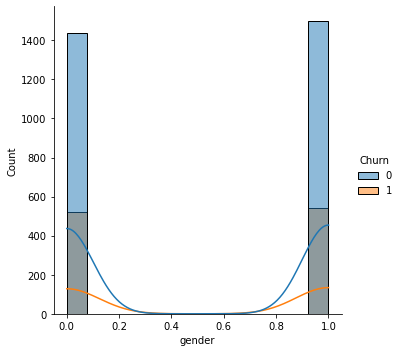

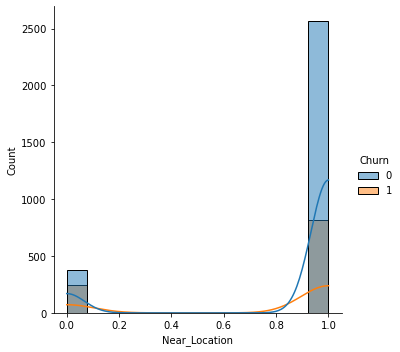

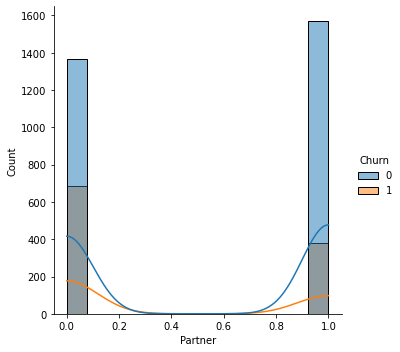

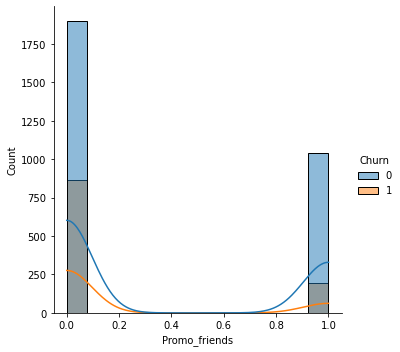

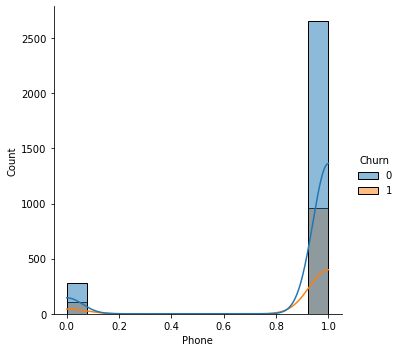

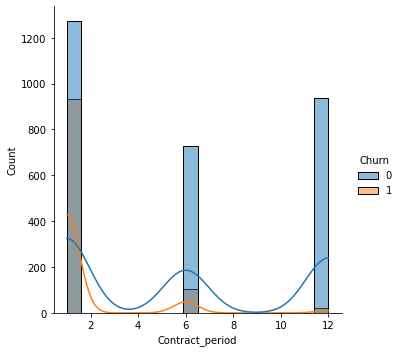

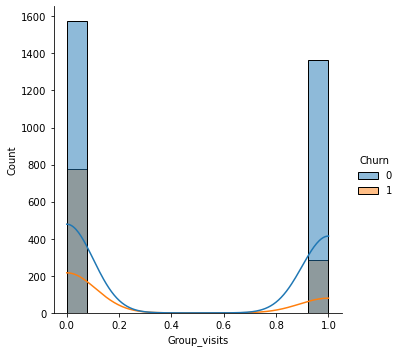

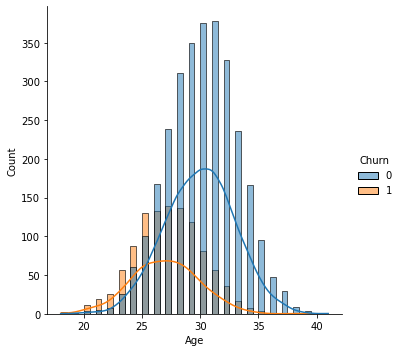

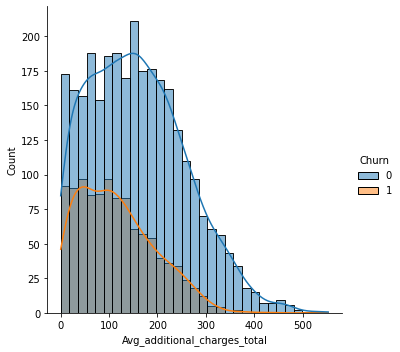

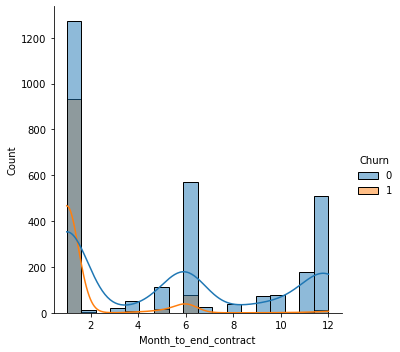

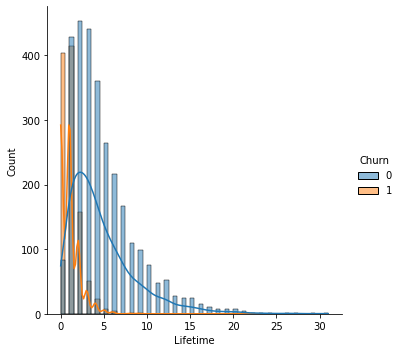

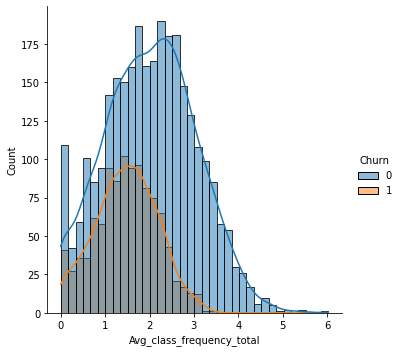

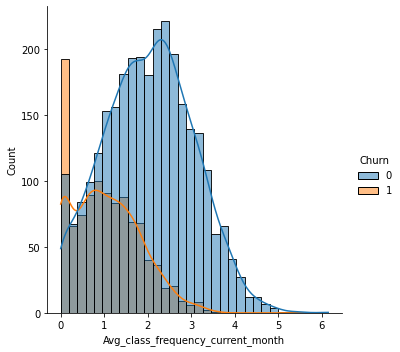

In [10]:
for cols in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    sns.displot(data=gym_churn, x=cols, kde=True, hue='Churn'),
    plt.show()

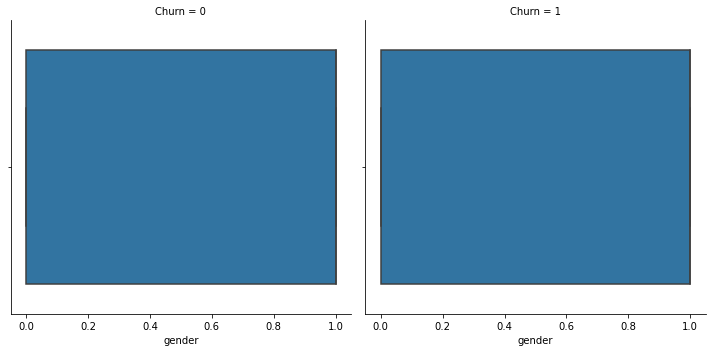

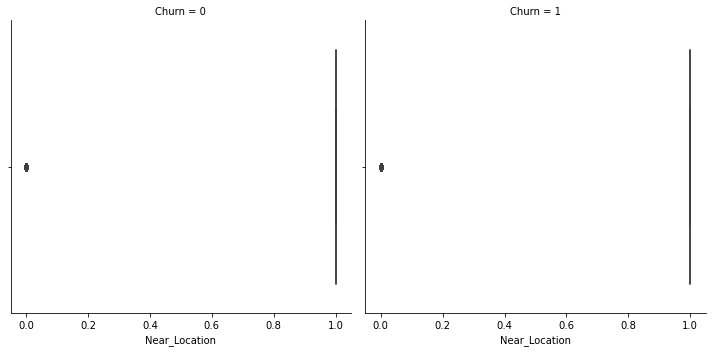

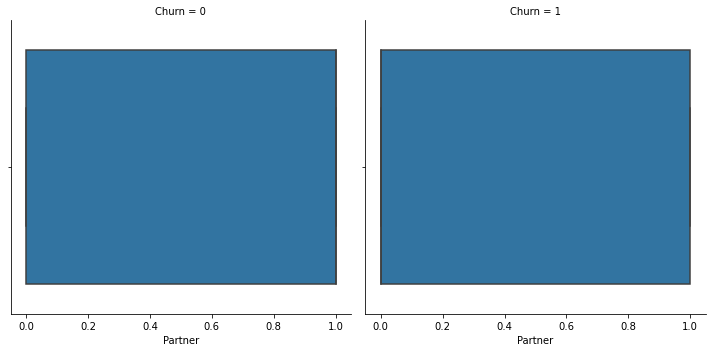

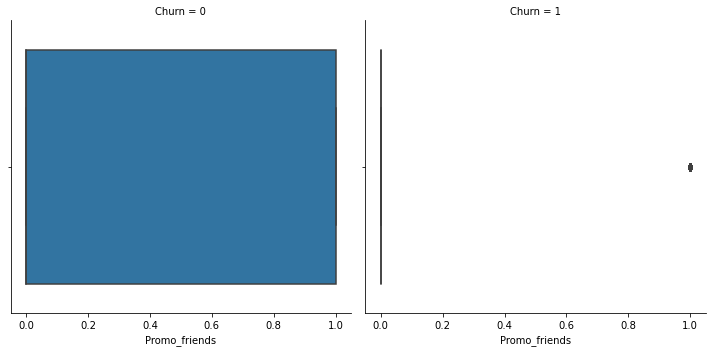

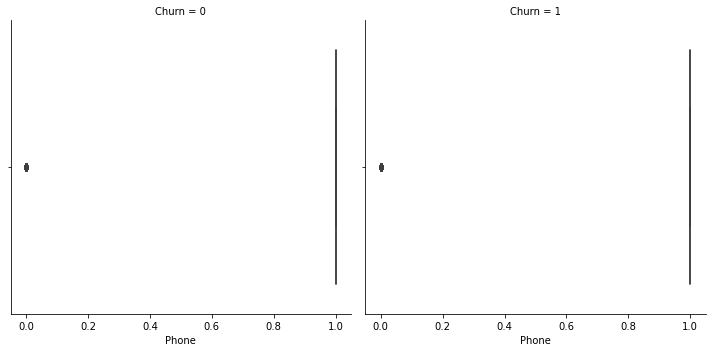

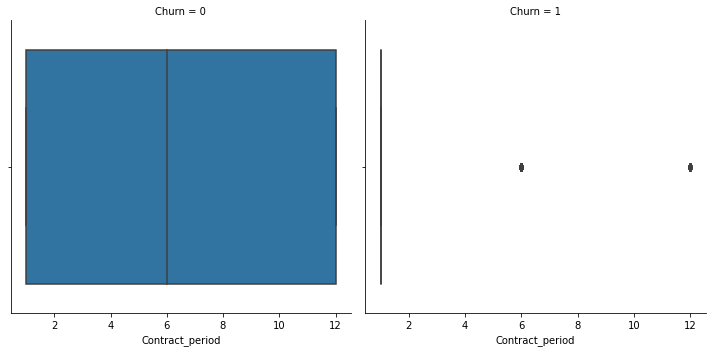

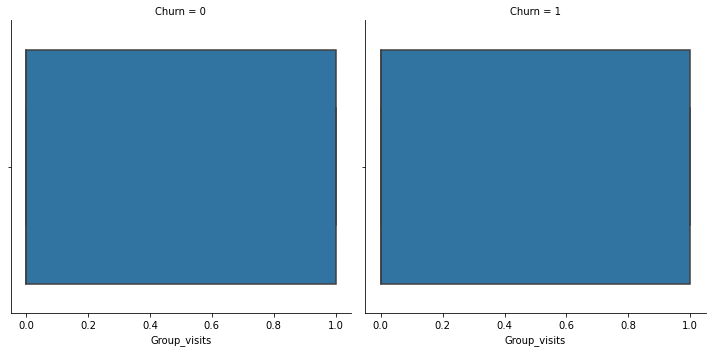

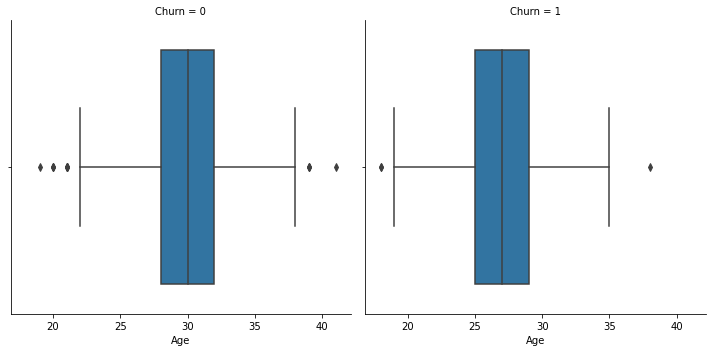

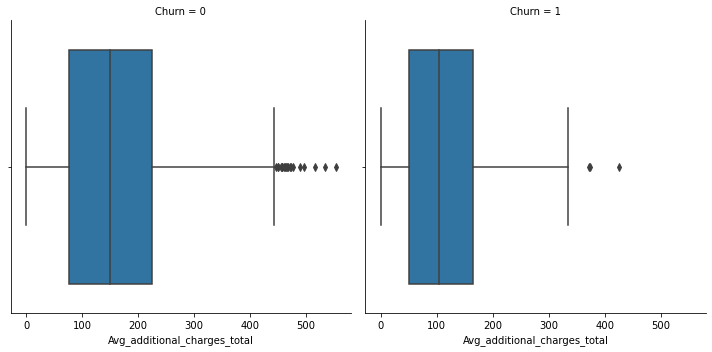

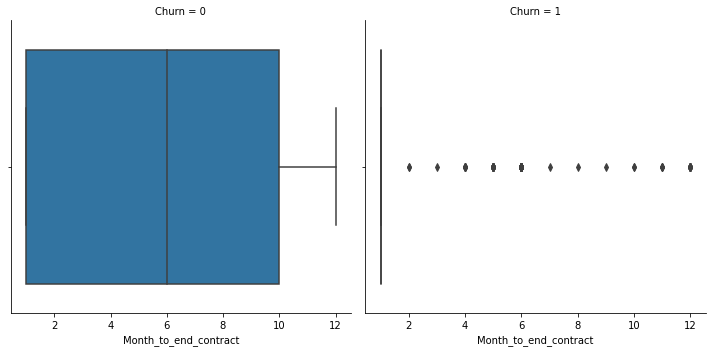

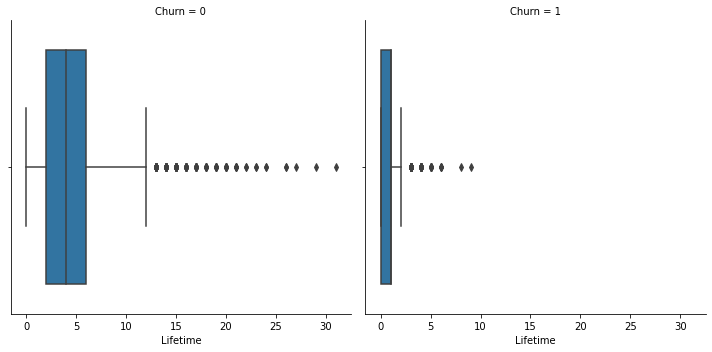

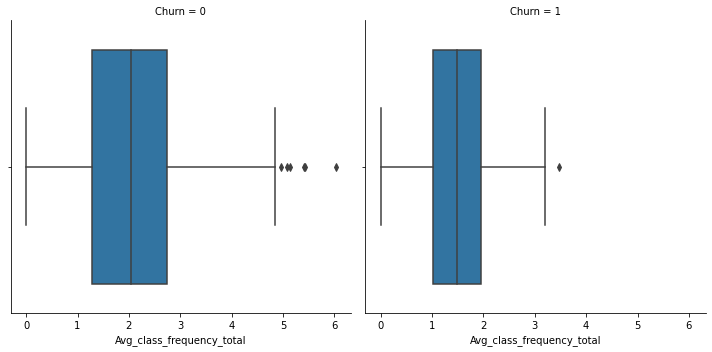

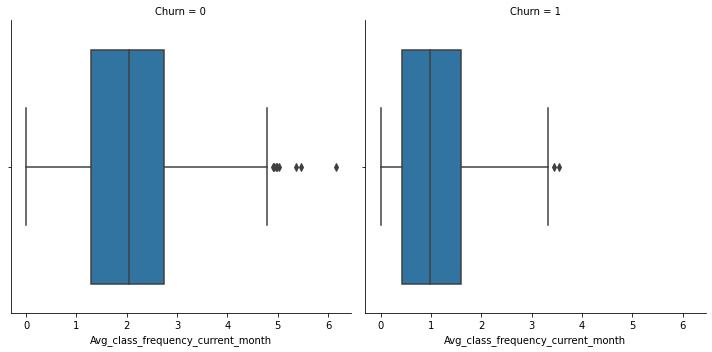

In [11]:
for cols in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']:
    sns.catplot(x=cols, col="Churn", data=gym_churn, kind="box")

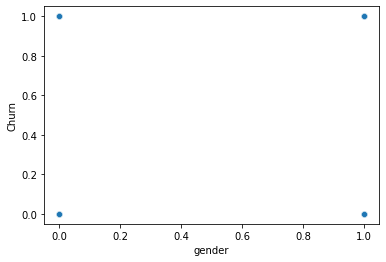

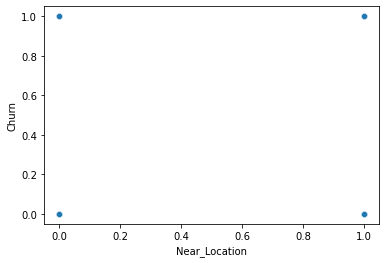

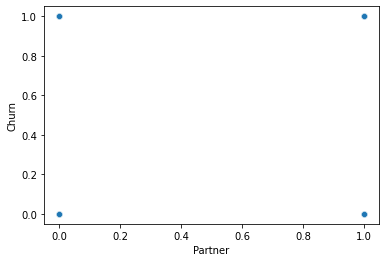

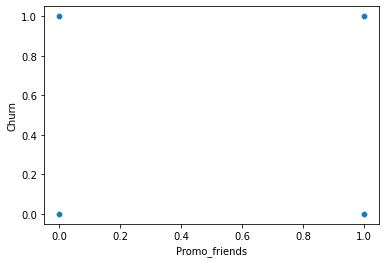

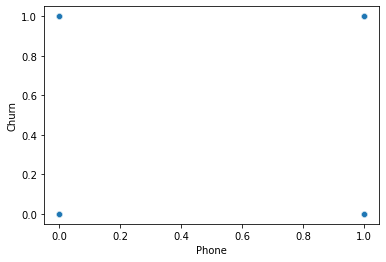

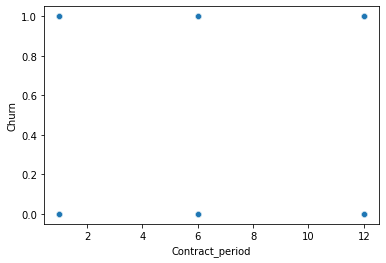

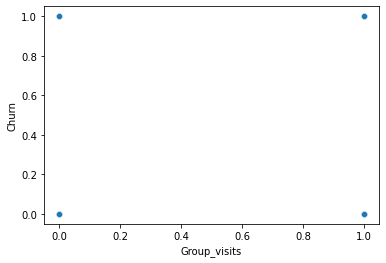

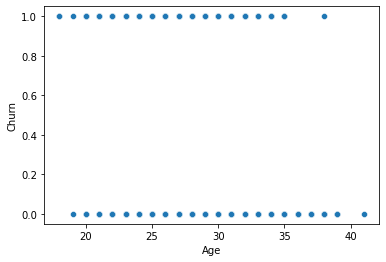

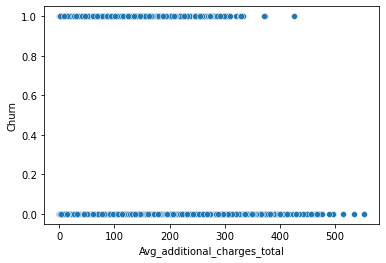

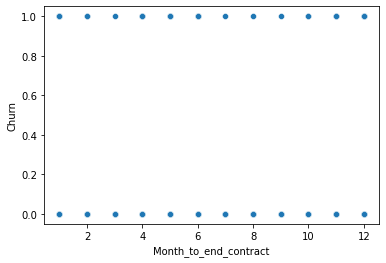

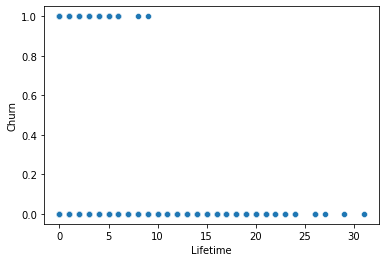

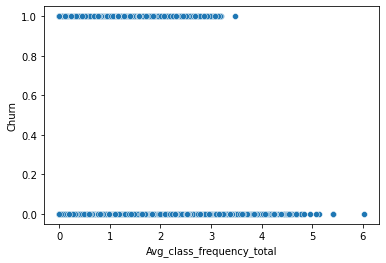

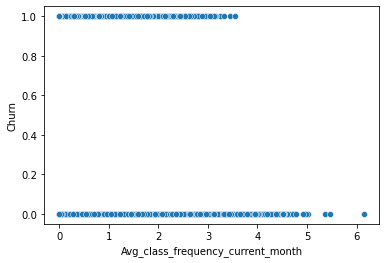

In [12]:
for col in gym_churn.drop('Churn', axis=1).columns:
    sns.scatterplot(gym_churn[col], gym_churn['Churn'])
    plt.show()

Видим, что графики подтверждают выводы, сделанные ранее. Попадают в "отток" клиенты более молодого возраста с 1- месячным абонементом, купленным самостоятельно, редко или вобще не посетившие фитнес-клуб за этот месяц. 

Такой короткий абонемент - проблема и для клуба в прогнозировании выручки, удержании клиентов, и для самого посетителя, так как за 1 месяц еще не вырабатывается привычка посещать фитнес-центр, его нельзя продлить при болезни или отъезде, не успевают сформироваться прочные связи в фитнес-сообществе.

Построим матрицу корреляций между признаками и отобразим ее на тепловой карте:

In [13]:
cm = gym_churn.corr() 

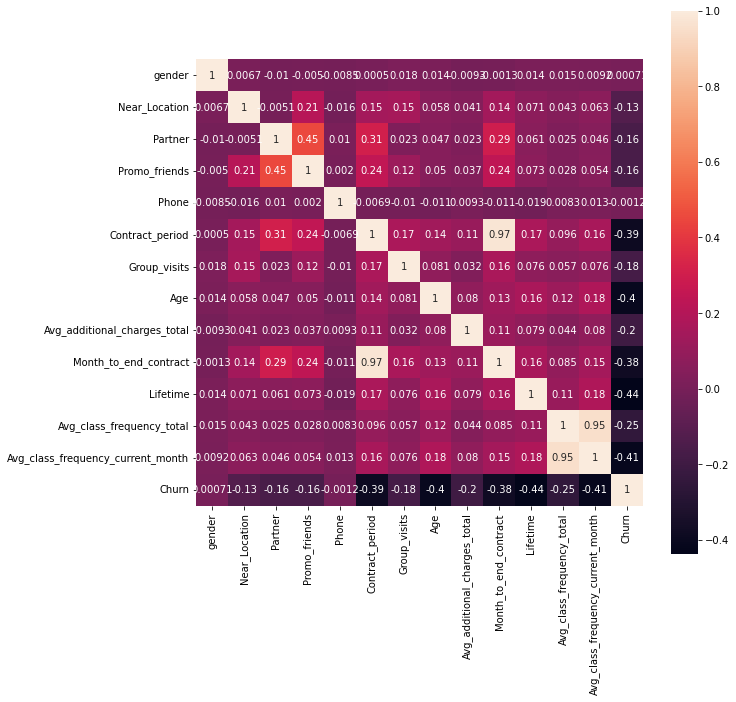

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True)
plt.show()

На тепловой карте видим сильную зависимость между 'Contract_period' и 'Month_to_end_contract' (97%),  'Avg_class_frequency_total 'и 'Avg_class_frequency_current_month' (95%).

Для избежания мультиколлениарности, то есть сильной связи между признаками, которая может снизить качество модели ML, создадим датасет, в котором удалим 1 из связанных столбцов, а также "идеальный" датасет, в котором избавимся от выбросов. Позже сравним результаты моделей между собой.

Создадим датасет, где удалим коррелирующие столбцы.

In [15]:
gym_normal=gym_churn.drop(columns=['Month_to_end_contract','Avg_class_frequency_total'])
gym_normal.shape

(4000, 12)

Посчитаем границы нормально распределенных признаков для каждого столбца, чтобы удалить "выбросы" в идеальном датасете "gym_ideal"

In [16]:
for column in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_current_month']:
    q25=gym_normal[column].quantile(0.25)
    q75=gym_normal[column].quantile(0.75)
    q1_5=1.5*(q75-q25)
    q_low = q25-q1_5
    q_high = q75+q1_5
    if q_low <=0:
        q_low = gym_normal[column].min()
    print(column,q_low,q_high)

gender 0 2.5
Near_Location 1.0 1.0
Partner 0 2.5
Promo_friends 0 2.5
Phone 1.0 1.0
Contract_period 1 13.5
Group_visits 0 2.5
Age 21.0 37.0
Avg_additional_charges_total 0.1482047884566242 424.07081667113033
Lifetime 0 11.0
Avg_class_frequency_current_month 0.0 4.831336242550881


In [17]:
gym_ideal=gym_normal.query('0 <= gender <=2.5')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('1.0 <= Near_Location <= 1.0')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0 <= Partner <= 2.5')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0 <= Promo_friends <= 2.5')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('1.0 <= Phone <= 1.0')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('1 <= Contract_period <= 13.5')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0 <= Group_visits <= 2.5')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('21.0 <= Age <= 37.0')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0.1482047884566242 <= Avg_additional_charges_total <= 424.07081667113033')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0 <= Lifetime <= 11.0')
display(len(gym_ideal)/len(gym_normal))
gym_ideal=gym_ideal.query('0.0 <= Avg_class_frequency_current_month <= 4.831336242550881')
display(len(gym_ideal)/len(gym_normal))

1.0

0.84525

0.84525

0.84525

0.762

0.762

0.762

0.7565

0.75075

0.71325

0.7115

## Вывод

Сравнив средние значения признаков по группам посещающих и клиентов-оттока, видим, что большинство посещающих (75% от всех) сдвигают общие средние оценки признаков, хотя между группами есть сильные отличия. 

Сформировали портрет "отвалившегося" клиента :

* живет дальше от клуба,
* пришел не по корпоративной программе
* пришел не по приглашению друга
* средний срок абонемента 1-3 месяца
* посещает групповые занятия в 2 раза реже тех, кто продолжает ходить в клуб
* средний возраст 27 лет (более молодой)
* заканчивает ходить ДО окончания абонемента (Lifetime < Month_to_end_contract)
* тратит на дополнительные услуги на 30% меньше
* в 2 раза реже ходит в клуб, чем те, кто продолжает ходить.

Построенные графики распределения и гистограммы признаков подтверждают выводы, сделанные ранее. Попадают в "отток" клиенты более молодого возраста с 1- месячным абонементом, купленным самостоятельно, редко или вобще не посетившие фитнес-клуб за этот месяц. 

Такой короткий абонемент - проблема и для клуба в прогнозировании выручки, удержании клиентов, и для самого посетителя, так как за 1 месяц еще не вырабатывается привычка посещать фитнес-центр, его нельзя продлить при болезни или отъезде, не успевают сформироваться прочные связи в фитнес-сообществе.

На тепловой карте видим сильную зависимость между 'Contract_period' и 'Month_to_end_contract' (97%),  'Avg_class_frequency_total 'и 'Avg_class_frequency_current_month' (95%).

В дальнейшем для решения задачи проекта построим модель ML. Для сравнения ее качества создали 2 датасета, в одном из которых gym_normal удалили коррелирующие столбцы, а в другом еще и "выбросы" - gym_ideal.
После удаления выбросов датасет сократился на 29%.


# Создание модели прогнозирования оттока клиентов

Перед нами стоит задача бинарной классификации, где целевой признак - факт оттока клиента в следующем месяце.

Эту задачу можно решить методами машинного обучения с помощью алгоритмов логистической регрессии и ансамбля "случайный лес". 

Напишем функцию, которая принимает датасет и обрабатывает его, делает прогноз оттока клиентов с помощью выбранных алгоритмов ML, рассчитывает метрики классификации. 

In [18]:
def prognoz (data):
    X=data.drop(columns='Churn', axis=1)
    y=data['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)# разбиваем данные на обучающую и тестовые выборки
    models=[LogisticRegression(solver='liblinear'),RandomForestClassifier(random_state=0)]# используем алгоритмы
    name =[x for x in globals() if globals()[x] is data][0] # выводим имя датасета
    print("Dataframe Name is: %s" % name)
    for i in models:
        print (i)
        i.fit(X_train, y_train) # обучим модель
        predictions = i.predict(X_test) # прогноз
        probabilities = i.predict_proba(X_test)[:,1] # вероятность целевого признака
        # Рассчитываем метрики
        acc=accuracy_score(y_test, predictions)
        precision=precision_score(y_test, predictions)
        recall=recall_score(y_test, predictions)
        f1=f1_score(y_test, predictions)
        roc_auc=roc_auc_score(y_test, predictions)
        print ('Acuracy:{:.3f} Precision:{:.3f} Recall:{:.3f} F1:{:.3f}  Roc_auc:{:.3f}'.format(acc, precision, recall, f1, roc_auc))
        
       
   # return X_train, X_test, y_train, y_test, predictions,probabilities,acc, precision, recall, f1, roc_auc
   
prognoz(gym_churn)# применим функцию к "сырым" данным

Dataframe Name is: gym_churn
LogisticRegression(solver='liblinear')
Acuracy:0.925 Precision:0.863 Recall:0.828 F1:0.845  Roc_auc:0.893
RandomForestClassifier(random_state=0)
Acuracy:0.916 Precision:0.839 Recall:0.818 F1:0.829  Roc_auc:0.883


In [19]:
prognoz(gym_normal)# применим функцию к данным без 2х столбцов 

Dataframe Name is: gym_normal
LogisticRegression(solver='liblinear')
Acuracy:0.897 Precision:0.793 Recall:0.793 F1:0.793  Roc_auc:0.862
RandomForestClassifier(random_state=0)
Acuracy:0.896 Precision:0.814 Recall:0.753 F1:0.782  Roc_auc:0.848


In [20]:
prognoz(gym_ideal)# применим функцию к данным без 2х столбцов и выбросов , к "идеальным" данным

Dataframe Name is: gym_ideal
LogisticRegression(solver='liblinear')
Acuracy:0.919 Precision:0.859 Recall:0.837 F1:0.848  Roc_auc:0.893
RandomForestClassifier(random_state=0)
Acuracy:0.900 Precision:0.869 Recall:0.739 F1:0.799  Roc_auc:0.849


Определим, какую модель выбрать, учитывая:
1. Так как нам важно снизить отток клиентов, то важна метрика Recall, так как лучше повзаимодействием даже с тем клиентом, который не хочет уходить из фитнес-клуба. (Он узнает о новых предложениях клуба)
2. Так как все взаимодействия с клиентом увеличивают затраты ресурсов (персонала, финансовые), то важна метрика Precision, то есть ориентированность только на тех, кто точно (по прогнозам) уйдет. 

## Вывод

Для окончательного выбора модели прогнозирования оттока необходимо знать "себестоимость" каждого маркетингового взаимодействия с клиентом, учитывать бюджет и ресурсы компании. 

Если бюджет позволяет, и клиент "приносит" больше выручки, чем затрат на него, то ориентируемся на Recall. 
Если отдел маркетинга еще не полностью оцифрован и бюджет ограничен и не всегда эффективен, то на Precision.

Так как большинство клиентов приходят на 1 месяц (видимо, выгодная цена), а также действуют корпоративные программы и акция "приведи друга", то делаем вывод , что маркетинговый бюджет есть, ресурсы есть. Также имеем в виду, что финансовая модель бизнеса предполагает, что клиент приносит выручку, превышающую затраты на его обслуживание, то ориентируемся на Recall.

Наилучшие результаты по метрике Recall показывает LogisticRegression на "идеальных" данных 0,837. Результат №2  - RandomForestClassifier() на "сырых" данных 0,828 и LogisticRegression на "сырых" данных.

Видим, что только избавление от мультиколлениарности не улучшает, а ухудшает качество моделей. Видимо, чем больше признаков, тем лучше, но помним, что модели могут быть склонны к переобучению.

На "идеальных" данных ключевая метрика Recall возрастает у логистической регрессии (не просто так она входит в модуль "linerial_model")

При итоговом выборе модели имеет смысл ориентироваться на балансирующие метрики f1, roc_auc. По ним №1 - LogisticRegression (идеальные данные), №2 - LogisticRegression (сырые данные), №3 - RandomForestClassifier( сырые данные)

Далее разделим клиентов на кластеры


# Кластеризация клиентов

Разделим клиентов на кластеры, чтобы выделить основыне особенности каждого из них и сформировать стратегию дальнейшего взаимодействия.

Стандартизируем данные перед обработкой алгоритмами:

In [21]:
sc=StandardScaler()

Построим дендрограмму на данных без "выбросов":

In [22]:
X=gym_ideal.drop(columns='Churn', axis=1)
y=gym_ideal['Churn']

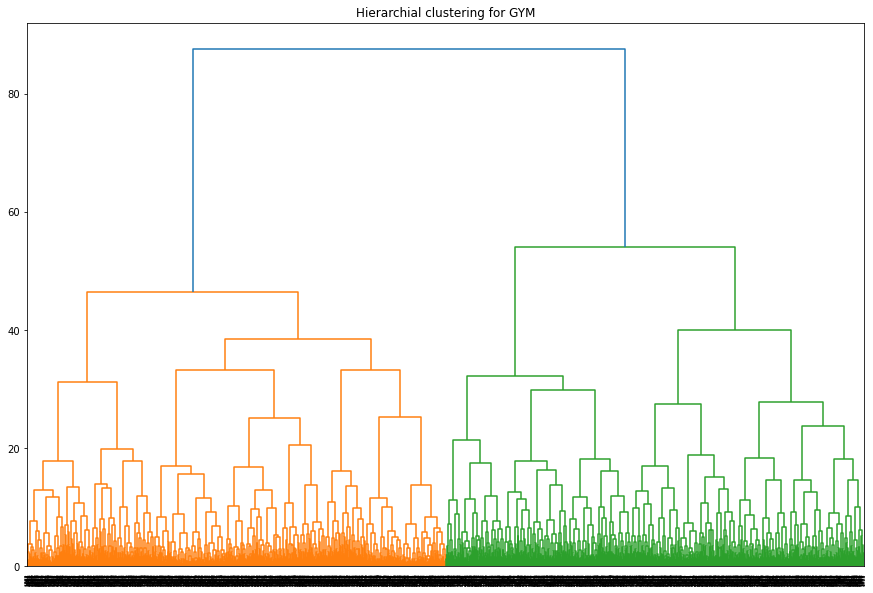

In [23]:
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Видим, что модель иерархической кластеризации поделила всех клиентов всего на 2 класса по "gym_ideal". Вероятно, на основе какого-то одного важного признака. Однако в реальной жизни кластеров явно больше, чем 2. 

Построим дендрограму по "gym_normal" :

In [24]:
X=gym_normal.drop(columns='Churn', axis=1)
y=gym_normal['Churn']

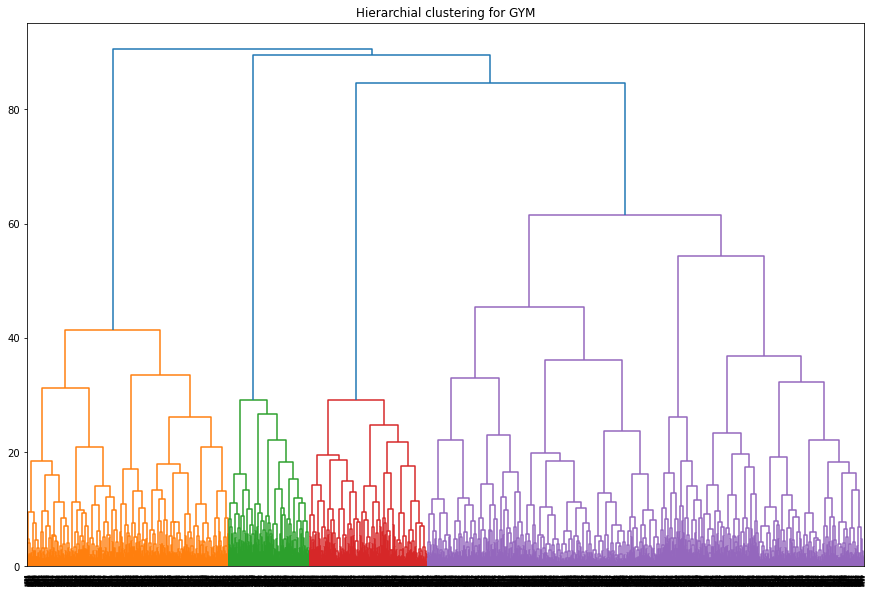

In [25]:
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Получили 4 кластера посетителей фитнес-клуба. Это похоже на реальное значение, не слишком много или мало, достаточно для эффективного взаимодействия с клиентами.

Обучим модель кластеризации на основании алгоритма KMeans. 

In [26]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # на  gym_normal
silhouette_score(X_sc,labels )

0.13904733417201764

In [27]:
X=gym_ideal.drop(columns='Churn', axis=1)
X_sc = sc.fit_transform(X)
labels = km.fit_predict(X_sc) # на  gym_ideal
silhouette_score(X_sc,labels )

0.11640655190688655

Видим, что с точки зрения кластеризации модель на gym_ideal слабее, чем на gym_normal. Оставим модель кластеризации на gym_normal. 

In [28]:
X=gym_normal.drop(columns='Churn', axis=1)
X_sc = sc.fit_transform(X)
labels = km.fit_predict(X_sc)
gym_normal['predict_churn']=labels

Посмотрим на средние значения признаков по кластерам:

In [29]:
gym_normal.groupby('predict_churn').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
predict_churn,,,,,,,,,,,,
0,0.496,0.996,0.892,1.000,1.000,6.923,0.525,29.606,153.425,4.283,1.920,0.120
1,0.500,0.000,0.489,0.079,1.000,2.995,0.233,28.679,137.126,2.975,1.597,0.403
2,0.501,1.000,0.217,0.072,1.000,2.010,0.277,27.584,119.340,1.923,1.203,0.564
3,0.534,0.996,0.379,0.010,1.000,6.209,0.538,30.699,176.260,5.415,2.324,0.015
4,0.523,0.863,0.472,0.306,0.000,4.777,0.427,29.298,144.208,3.940,1.724,0.267


Видим, что максимальное среднее значение оттока клиентов имеют кластеры №3 (56,4) и №2 (0,403), при этом у них :
* малая средняя частота посещений за неделю (1,2 и 1,59)
* минимальный Lifetime (1,9 и 2,97)
* самый молодой возраст (27,5 и 28,6)
* реже посещают групповые занятия, чем остальные кластеры
* самый короткий абонемент

Краткая характеристика кластеров:

Кластер 4: Самые возрастные ( 30,7 лет), дольше и чаще всех ходят Lifetime и Avg_class_frequency_current_month 5,4 и 2,3 раз/неделя, абонементы на 6,2 мес, часто посещают групповые занятия, минимальный прогноз оттока 1,5%.

Кластер 1: На втором месте по возрасту, по допольнительным тратам в клубе, среднему посещению 1,9 раз / неделя,посещают групповые занятия,с самыми длинными абонементами, приходят по акции "Приведи друга" и корпоративным программам, прогноз оттока 12%.

Кластер 5:  На третьем месте по возрасту, по допольнительным тратам в клубе, среднему посещению 1,7 раз / неделя,посещают групповые занятия,с абонементами на 4,7 месяцев,приходят по акции "Приведи друга" и корпоративным программам, прогноз оттока 26,7%.

Кластер 2: На четвертом месте по возрасту, по допольнительным тратам в клубе, среднему посещению 1,6 раз / неделя, редко посещают групповые занятия,с абонементами на 2,9 месяцев,приходят по корпоративным программам, прогноз оттока 40,3%.

Кластер 3: самые молодые посетители, меньше всех тратят дополнительно, приходят сами, не с другом или от компании, реже всех ходят в месяц и на групповые программы, самый большой отток 56,4%


Посторим распределение признаков для кластеров: 

In [30]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()


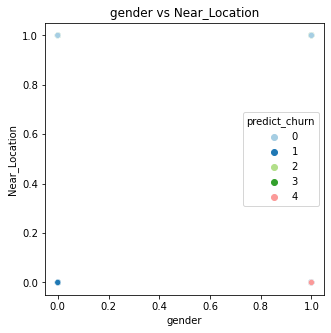

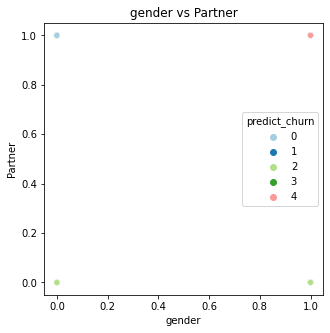

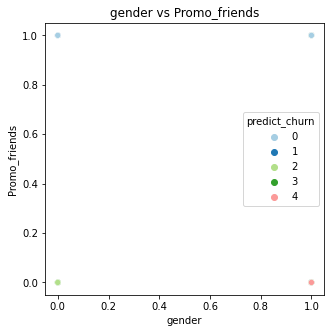

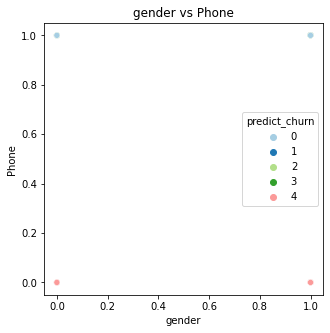

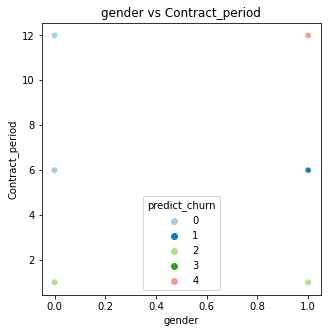

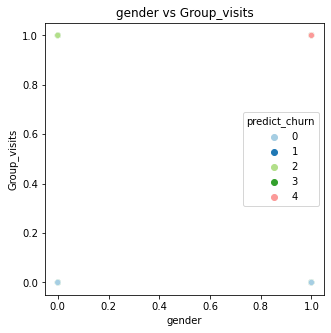

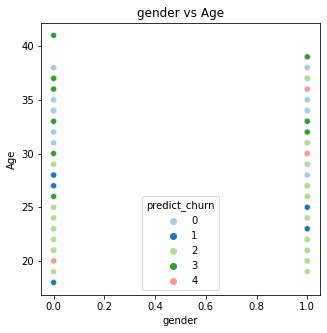

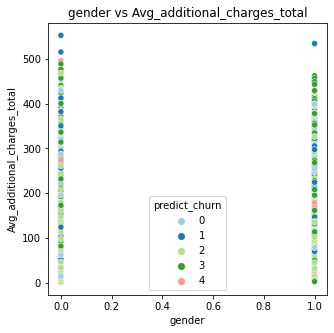

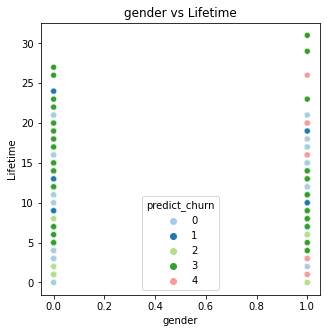

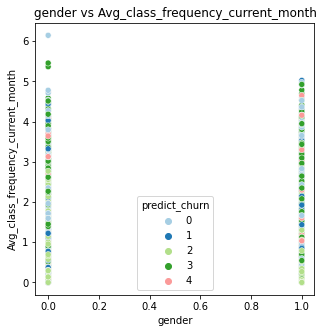

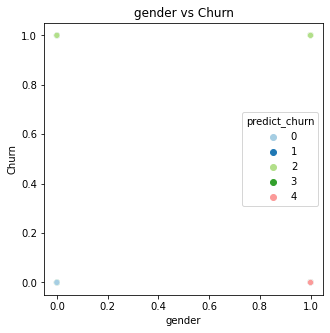

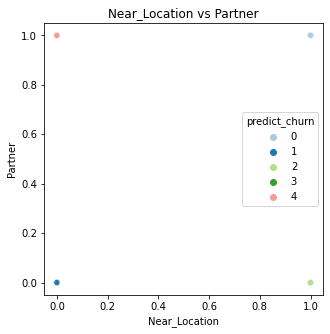

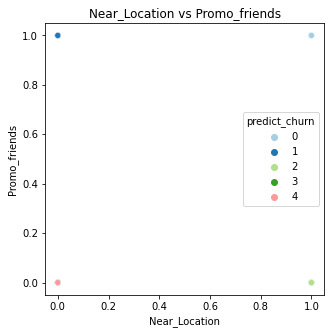

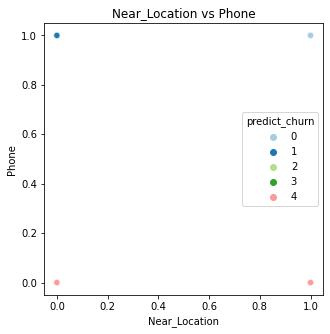

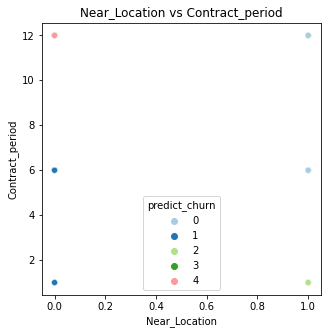

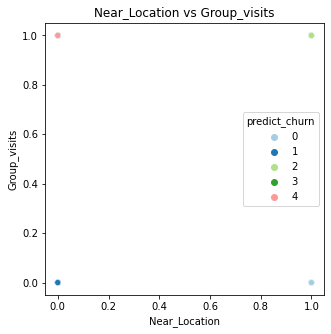

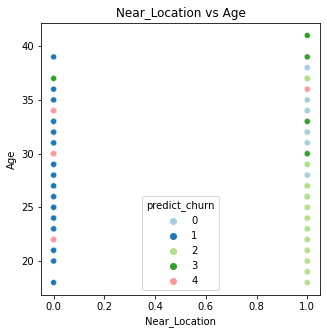

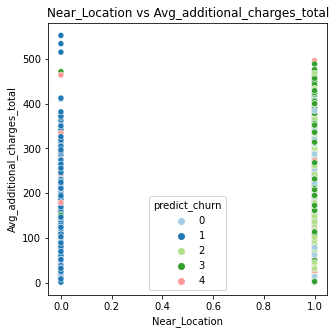

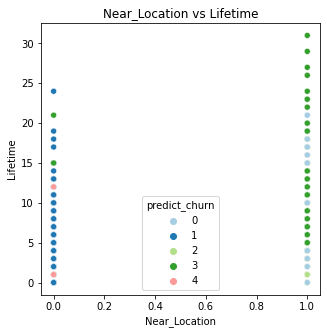

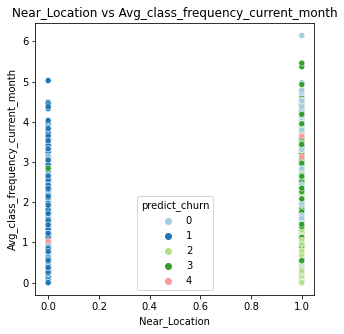

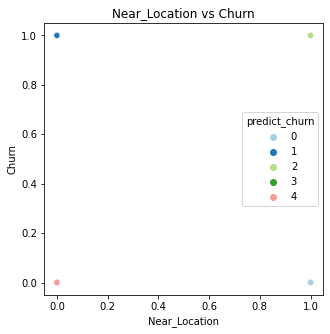

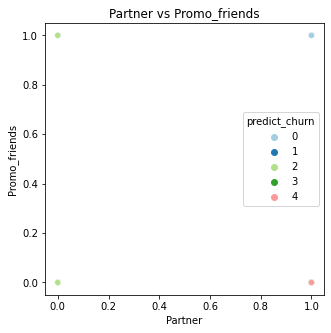

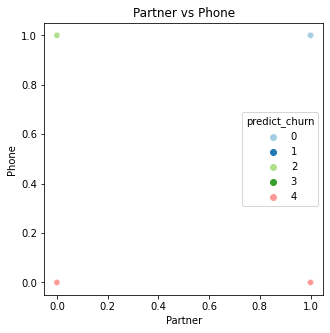

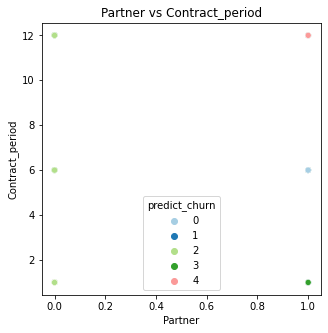

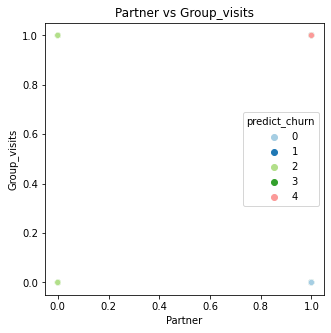

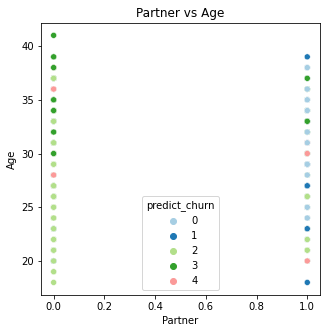

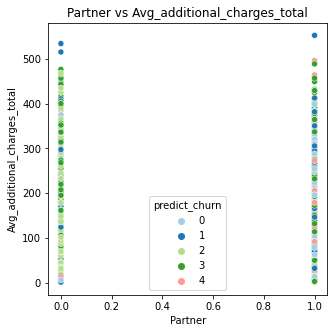

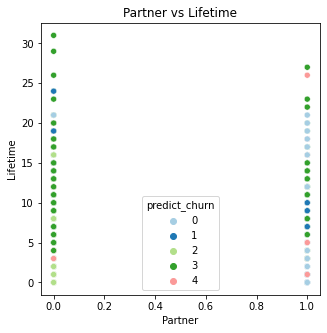

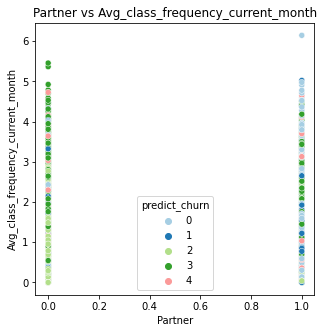

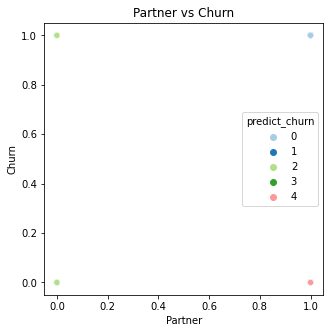

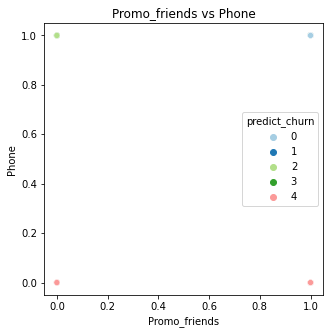

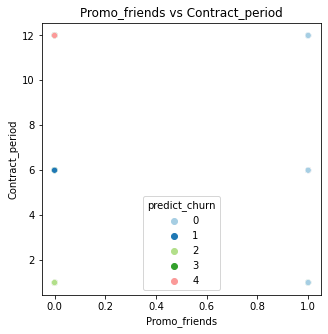

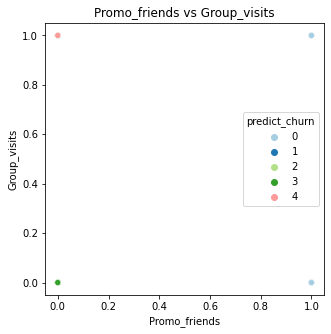

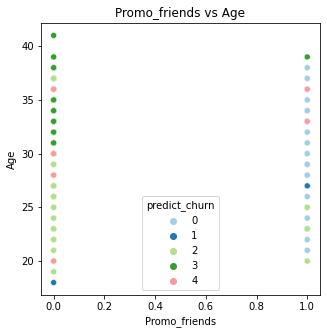

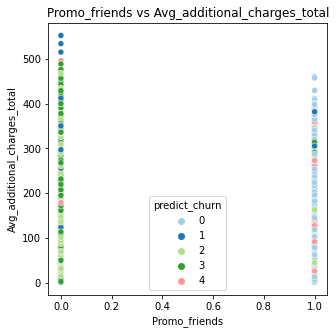

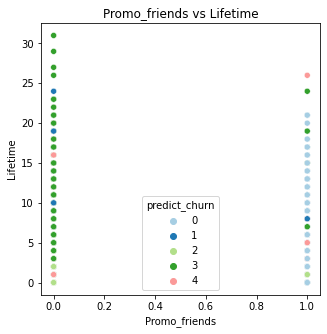

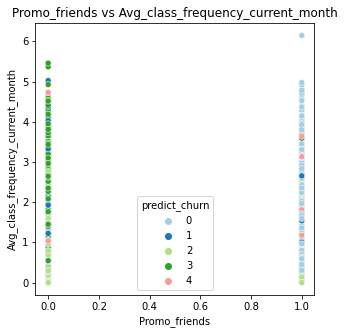

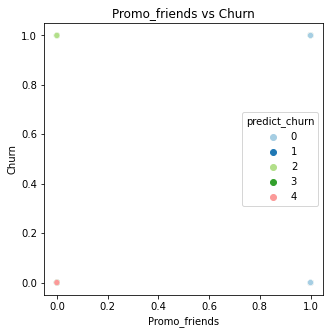

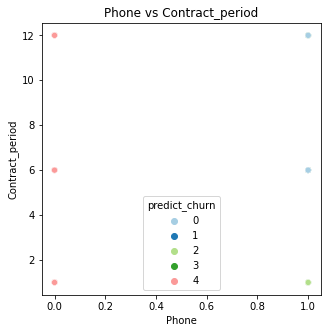

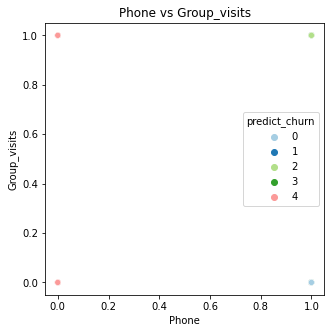

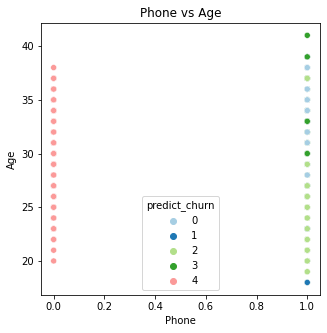

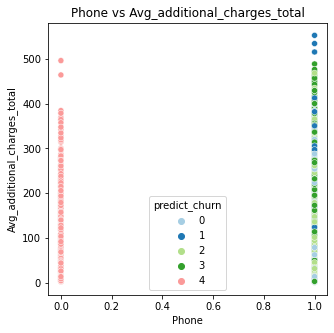

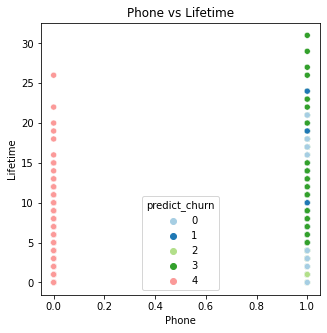

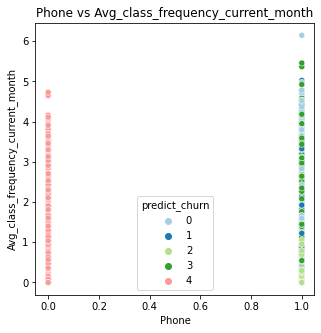

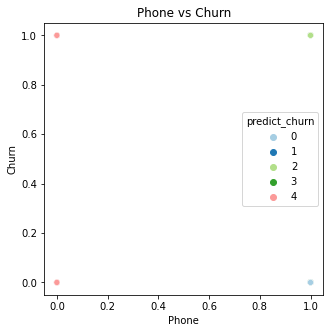

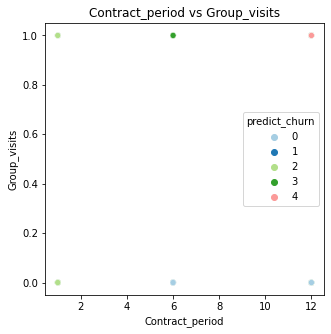

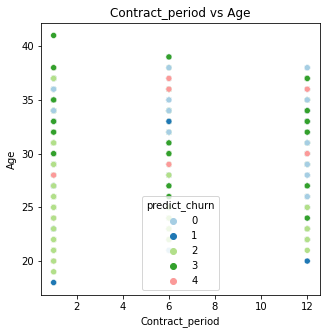

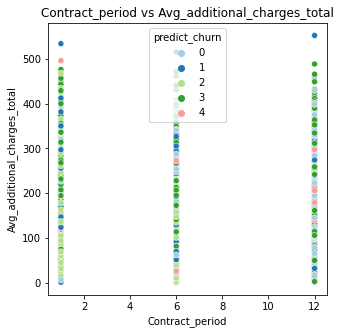

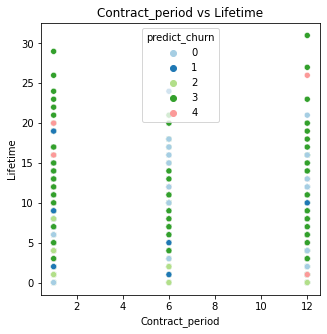

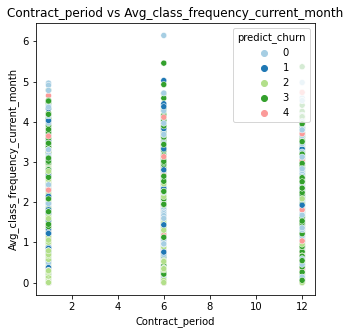

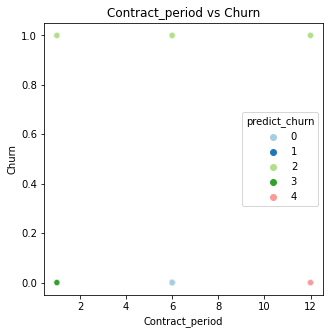

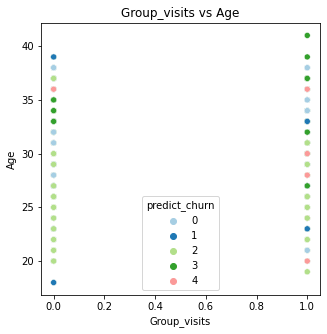

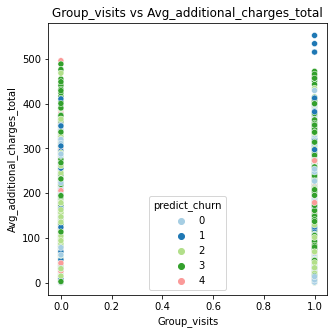

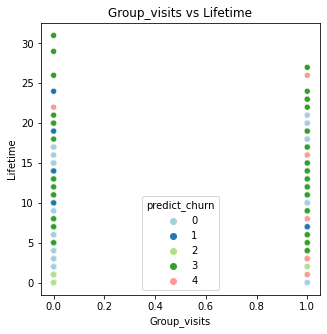

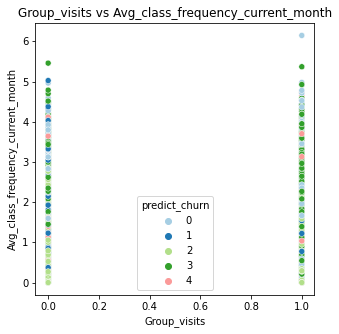

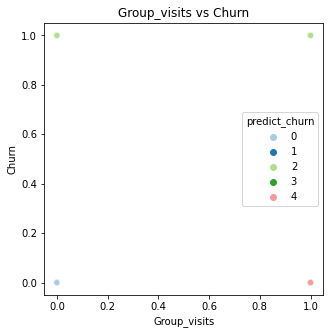

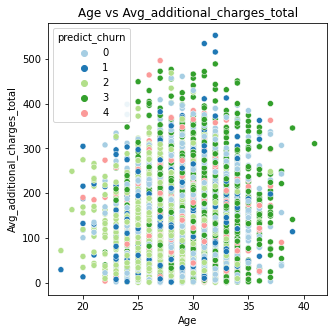

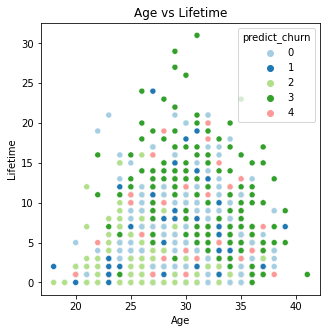

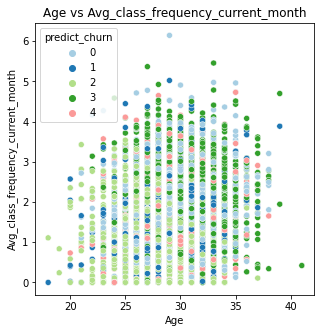

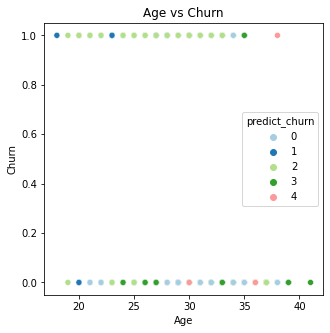

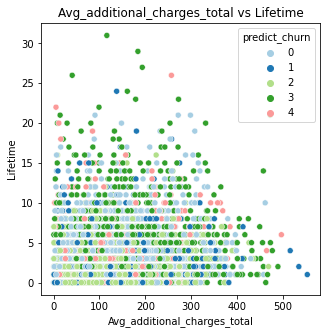

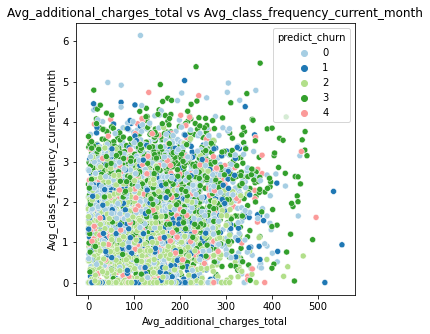

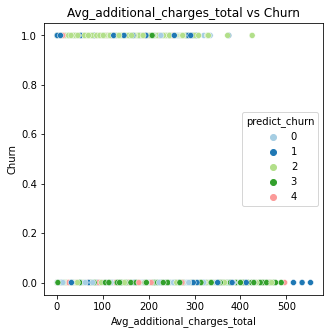

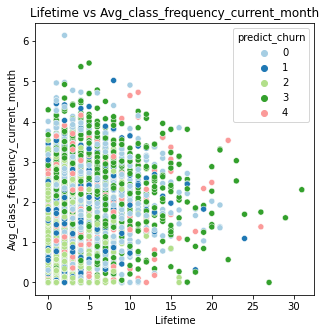

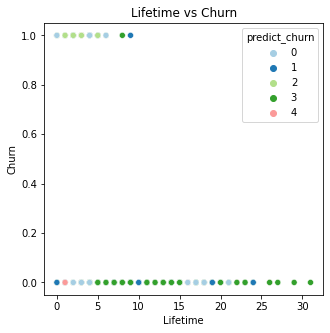

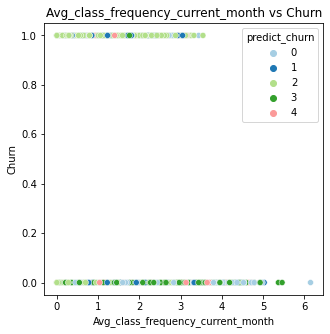

In [31]:
col_pairs = list(itertools.combinations(gym_normal.drop('predict_churn', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(gym_normal, pair[0], pair[1], 'predict_churn')

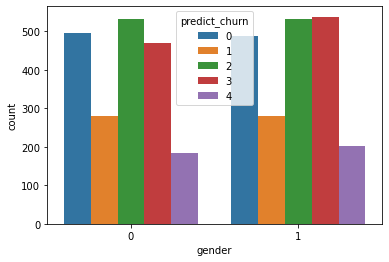

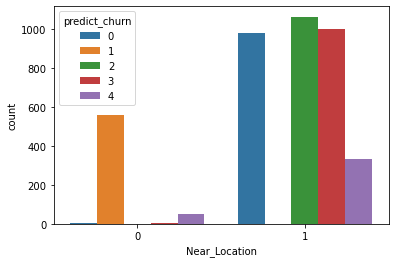

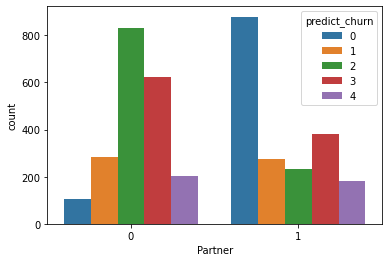

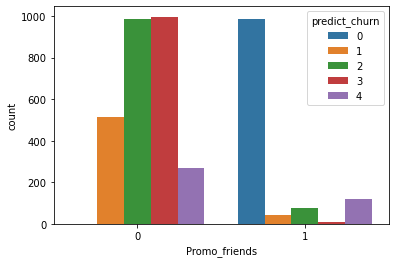

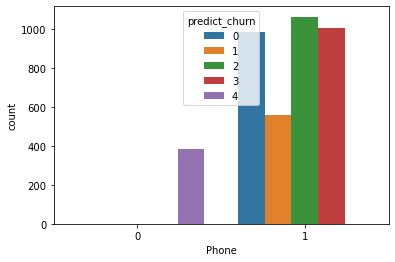

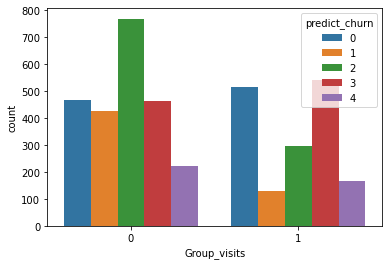

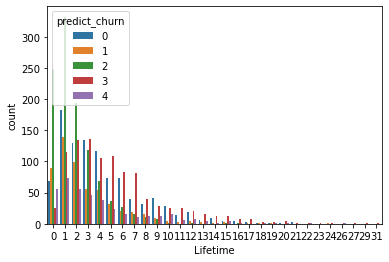

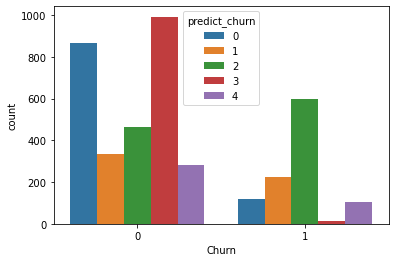

In [32]:
for cols in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
      'Group_visits', 'Lifetime', 'Churn']:
    sns.countplot(data = gym_normal, x = cols, hue = 'predict_churn')
    plt.show()

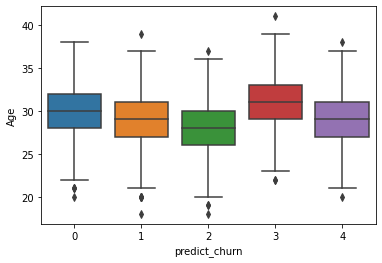

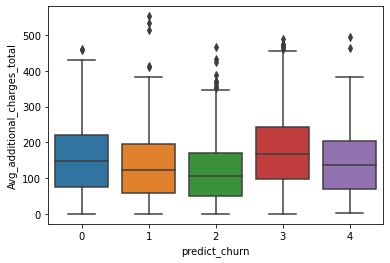

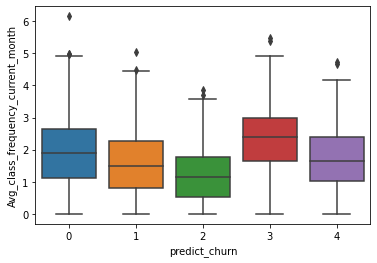

In [33]:
for cols in ['Age','Avg_additional_charges_total', 'Avg_class_frequency_current_month']:
    sns.boxplot(x = 'predict_churn',y = cols, data = gym_normal)
    plt.show()

Графики отражают ранее сделанные выводы не очень наглядно. Представим парную корреляцию между стандартизированными признаками в виде тепловой карты С УЧЕТОМ прогноза кластера.

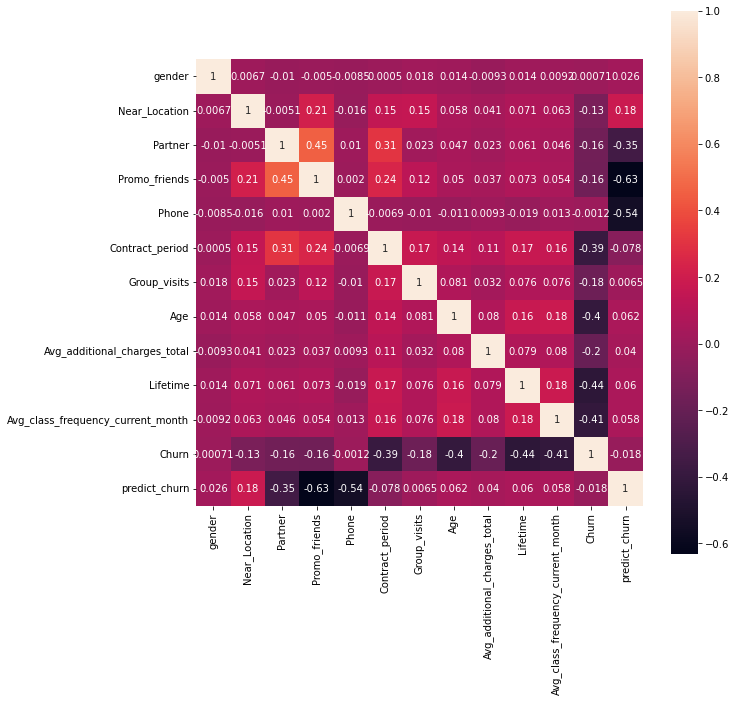

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(gym_normal.corr(), annot=True, square=True)
plt.show()

Видим, что на прогноз оттока 'predict_churn' наибольшее влияние имеет обратная корреляция с 'Promo_friends' (-0.63), 'Phone' (-0.54), 'Partner' (-0.35) и 'Near_Location' (0,18), то есть признаки социальных связей оказывают обратное воздействие на отток клиентов. Фактор близости иногда играет в обратном направлении, кажется, что клуб близко и "всегда успею сходить".

На факт оттока 'Churn' наибольшее влияние имеет обратная корреляция с 'Lifetime' (-0,44), 'Avg_class_frequency_current_month' (-0,41), 'Age' (-0,4), 'Contract_period' (-0,39), то есть моложой возраст, редкое посещение, короткий абонемент не способствуют продолжить посещение.


In [35]:
churn_shares=gym_normal.groupby('predict_churn')['Churn'].sum()/(gym_normal['Churn'].sum())

In [36]:
(churn_shares).map('{:,.2%}'.format)

predict_churn
0    11.12%
1    21.21%
2    56.55%
3     1.41%
4     9.71%
Name: Churn, dtype: object

Кластеры в 'Churn' и 'predict_churn' отличаются по доле оттока только в позиции №3 (1 и 5 кластеры соотвественно).

Данные оценки имеют под собой разную корреляцию с разными признаками, как было отмечено выше. 

## Вывод

В процессе кластеризации строили дендрограмму по разным датасетам. По очищенным данным модель определяет 2 кластера, по нормальным данным - 4. 

Модель кластеризации на основании алгоритма KMeans при очищенных данных также имеет более низкое качество, поэтому прогнозирование осуществлялось по нормальным данным их gym_normal и делением на 5 кластеров.

Максимальное среднее значение оттока клиентов имеют кластеры №3 (56,4) и №2 (0,403), при этом у них :
* малая средняя частота посещений за неделю (1,2 и 1,59)
* минимальный Lifetime (1,9 и 2,97)
* самый молодой возраст (27,5 и 28,6)
* реже посещают групповые занятия, чем остальные кластеры
* самый короткий абонемент

Видим, что на прогноз оттока 'predict_churn' наибольшее влияние имеет обратная корреляция с 'Promo_friends' (-0.63), 'Phone' (-0.54), 'Partner' (-0.35) и 'Near_Location' (0,18), то есть признаки социальных связей оказывают обратное воздействие на отток клиентов. Фактор близости иногда играет в обратном направлении, кажется, что клуб близко и "всегда успею сходить".

На факт оттока 'Churn' наибольшее влияние имеет обратная корреляция с 'Lifetime' (-0,44), 'Avg_class_frequency_current_month' (-0,41), 'Age' (-0,4), 'Contract_period' (-0,39), то есть молодой возраст, редкое посещение, короткий абонемент не способствуют продолжить посещение.

# Итоги работы

Перед нами стояла задача бинарной классификации, где целевой признак - факт оттока клиента в следующем месяце.

Эту задачу можно решить методами машинного обучения с помощью алгоритмов логистической регрессии и ансамбля "случайный лес", а также с помощью кластеризации клиентов. 

От заказчика получили данные, обработали их и уже на первом этапе выявили особенности и некоторые предпосылки будущего оттока и снижения выручки:
1. 75% клиентов имеют краткосрочные абонементы всего на 1 месяц. Почему? (Акционная цена на 1 месяц? - поработать с ценообразованием и сделать наиболее выгодными длинные годичные абонементы. Подключить возможность приобретения абонементов в рассрочку с помощью банков)
2. 25% пользуются копоративным посещением и 25% пришли по рекомендации друга - хороший показатель работы "сарафанного радио" и работы отдела продаж корпоративным клиентам.
3. Всего четверть клиентов посещают групповые занятия - это низкий показатель, ведь благодаря групповым занятиям складывается сообщество посещающих разные классы, растет вовлеченность клиентов в коллектив и фитнес-клуб в целом. Возможно , групповые занятия стоят в неудобное для большинства время. Необходимо выделить наиболее удобное вермя для посещения групповых занятий, например, провести анкетирование клиентов, собрать жалобы и предложения.
4. Возраст клиентов от 18 до 41 года. А где люди старше 41 года? Недоработка отдела маркетинга по привлечению клиентов старшего возраста? Предпенсионерами и пенсионерами можно заполнить дневные групповые занятия. (Для работы с клиентами младше 18 лет необходимы отдельные условия, если они есть, то отделу маркетинга необходимо привлекать и их, например, в анкетах регистрации сделать поле выбора "дети" и далее при заполненном поле взаимодействовать с этими клиентами)
Также возраст в 41 год можно объяснить спецификой фитнес-клуба : наличие сложных программ и тренажеров, требующих профессиональной подготовки и отличных физических данных, которыми люди старшего возраста часто не обладают. (Или тем, что 20 лет назад "Датасаентистов" попросту не было))
5. У большинства клиентов в текущем или следующем месяце закончится абонемент - это создает неопределенность в прогнозировании выручки. Решение - специальные предложения для тех, у кого заканчивается абонемент; продажа долгосрочных абонементов (по привлекательной цене и /или в рассрочку)
6. Большинство клиентов впервые посетило данную сеть фитнес-клубов меньше года назад. (Клуб открылся недавно или клиенты по каким-то причинам не продлевают годовые абонементы?)

Составили портрет "отвалившегося" клиента :
* живет дальше от клуба,
* пришел не по корпоративной программе
* пришел не по приглашению друга
* средний срок абонемента 1-3 месяца
* посещает групповые занятия в 2 раза реже тех, кто продолжает ходить в клуб
* средний возраст 27 лет (более молодой)
* заканчивает ходить ДО окончания абонемента (Lifetime < Month_to_end_contract)
* тратит на дополнительные услуги на 30% меньше
* в 2 раза реже ходит в клуб, чем те, кто продолжает ходить.

То есть молодой человек (независимо от пола) пришел сам, купил абонемент на короткий срок, ходил 1 раз в неделю, практически не ходил на групповые занятия, сказал об окончании посещения до окончания абонемента (возможно, обратился за возвратом средств за неиспользованное время).

Для выбора модели прогнозирования оттока необходимо знать "себестоимость" каждого маркетингового взаимодействия с клиентом, учитывать бюджет и ресурсы компании. 

Если бюджет позволяет, и клиент "приносит" больше выручки, чем затрат на него, то ориентируемся на Recall. 
Если отдел маркетинга еще не полностью оцифрован и бюджет ограничен и не всегда эффективен, то на Precision.

Определим, какую модель выбрать, учитывая:
1. Так как нам важно снизить отток клиентов, то важна метрика Recall, так как лучше повзаимодействием даже с тем клиентом, который не хочет уходить из фитнес-клуба. (Он узнает о новых предложениях клуба)
2. Так как все взаимодействия с клиентом увеличивают затраты ресурсов (персонала, финансовые), то важна метрика Precision, то есть ориентированность только на тех, кто точно (по прогнозам) уйдет. 

Так как большинство клиентов приходят на 1 месяц (видимо, выгодная цена), а также действуют корпоративные программы и акция "приведи друга", то делаем вывод , что маркетинговый бюджет есть, ресурсы есть. Также имеем в виду, что финансовая модель бизнеса предполагает, что клиент приносит выручку, превышающую затраты на его обслуживание, то ориентируемся на Recall.

В процессе кластеризации строили дендрограмму по разным датасетам. По очищенным данным модель определяет 2 кластера, по нормальным данным - 4. 

Модель кластеризации на основании алгоритма KMeans при очищенных данных также имеет более низкое качество, поэтому прогнозирование осуществлялось по нормальным данным их gym_normal и делением на 5 кластеров.

Максимальное среднее значение оттока клиентов имеют кластеры №3 (56,4) и №2 (0,403), при этом у них :
* малая средняя частота посещений за неделю (1,2 и 1,59)
* минимальный Lifetime (1,9 и 2,97)
* самый молодой возраст (27,5 и 28,6)
* реже посещают групповые занятия, чем остальные кластеры
* самый короткий абонемент

Видим, что на ПРОГНОЗ оттока 'predict_churn' наибольшее влияние имеет обратная корреляция с 'Promo_friends' (-0.63), 'Phone' (-0.54), 'Partner' (-0.35) и 'Near_Location' (0,18), то есть признаки социальных связей оказывают обратное воздействие на отток клиентов, то есть клиенты, общающиеся с другими, не так часто уходят из фитнес-клуба. Важно создавать сообщество, коллектив, например, на групповых программах,  устраивать мероприятия в клубе для знакомства участников. Фактор близости иногда играет в обратном направлении, кажется, что клуб близко и "всегда успею сходить".

На ФАКТ оттока 'Churn' наибольшее влияние имеет обратная корреляция с 'Lifetime' (-0,44), 'Avg_class_frequency_current_month' (-0,41), 'Age' (-0,4), 'Contract_period' (-0,39), то есть молодой возраст, редкое посещение, короткий абонемент не способствуют продолжить посещение.


Также по поводу ML видим, что разные алгоритмы и модели ведут себя по-разному на одних и тех же данных. И подобрать верную и работающую модель - по-истине искусство и нелегкий труд.